In [7]:
import scipy as sci
import scipy.optimize
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt

# Part 1

Consider first the Market (B,S1,S2) given by:
\begin{align}
S_1^1=\begin{bmatrix}36\\24\\20\\12\end{bmatrix},S_1^2=\begin{bmatrix}72\\120\\96\\48\end{bmatrix}, B_1=(1+r)
\end{align}
Where:
\begin{align}
S_0^1=11, S_0^2=44, r=1
\end{align}

With probabilities:
\begin{align}
Q=[1/6,1/6,1/2,1/6]
\end{align}


## (i)

Consider now the straddle option on $S^1$ with strike $K=24$, which has payoff:
\begin{align}
X_1=(S_1^1-24)^++(24-S1_1^1)^+ =\begin{bmatrix}12\\0\\4\\12\end{bmatrix}
\end{align}

Briefly consider the reduced market of $(B,S^1)$ show that $X$ is irreplicable and becomes replicable when we include $S^2$ in the market


In [2]:
#set up our linear programme
c=[0,0] #vector of coefficients for the linear function to be minimised
A=[[1,7],[1,1],[1,-1],[1,-5]] #matrix of coefficients of each linear inequality
b=[6,0,2,6] # vector of right hand side inequality values
x=[0,None] # bounds on initial capital
h1=[None,None] # bounds on amount of S1
sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[x,h1])

<ipython-input-2-7042de567343>:7: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[x,h1])


     con: array([6., 0., 2., 6.])
     fun: 0.0
 message: 'There is a linear combination of rows of A_eq that results in zero, suggesting a redundant constraint. However the same linear combination of b_eq is nonzero, suggesting that the constraints conflict and the problem is infeasible.'
     nit: 0
   slack: array([], dtype=float64)
  status: 2
 success: False
       x: array([0., 0.])

We see that the problem is infeasible, so $X$ can not be replicated

## (ii)

If we now consider the full market that includes $S^2$, is such a market free of arbitrage?

In [3]:
s11=[36,24,20,12]
s12=[72,120,96,48]
s01=11
s02=44
r=1
#find u and d for each underlying
u1=np.max(s11)/s01
d1=np.min(s11)/s01
u2=np.max(s12)/s02
d2=np.min(s12)/s02
#Check if the 1+r lies between d and u
print(d1<(1+r)<u1)
print(d2<(1+r)<u2)

True
True


We can also find the set of Equivalent Martingale measures as
\begin{align}
Q=\begin{bmatrix}1/6\\\frac{1}{2}-\frac{2}{3}t\\t\\\frac{1-t}{3}\end{bmatrix}, t\in (0,\frac{3}{4})
\end{align}
We can see then that the set of equivalent martingale measures is not a null set, so there is no arbitrage

This is found by solving:
\begin{align}
q_1\frac{36}{2}+q_2\frac{24}{2}+q_3\frac{20}{2}+q_4\frac{12}{2}=11 \\
q_1\frac{72}{2}+q_2\frac{120}{2}+q_3\frac{96}{2}+q_4\frac{48}{2}=44 \\
q_1+q_2+q_3+q_4=1
\end{align}

In [20]:
#Implementing the above equations as Ax=b
A=np.array([[18,12,10,6],[36,60,48,24],[1,1,1,1]])
b=np.array([11,44,1])
#The bounds on each qi
q1=[0,1]
q2=[0,1]
q3=[0,1]
q4=[0,1]

for i in range(0,4):
    #at each point we find the maximal and minimal values of each qi that satisfies the equations
    qi=np.zeros(4)
    qi[i]=1
    print("Lower bound of q%s"%(i+1),Fraction(sci.optimize.linprog(qi,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[q1,q2,q3,q4]).x[i]).limit_denominator())
    print("Upper bound of q%s"%(i+1),Fraction(sci.optimize.linprog(-qi,A_eq=-A,b_eq=-b,options={"presolve" : "False"},bounds=[q1,q2,q3,q4]).x[i]).limit_denominator())

Lower bound of q1 1/6
Upper bound of q1 1/6
Lower bound of q2 0
Upper bound of q2 1/2
Lower bound of q3 0
Upper bound of q3 3/4
Lower bound of q4 1/12
Upper bound of q4 1/3


This confirms the above calculation

## (iii)

In this market is the straddle $X$ given above replicable, if so what is it's arbitrage free price?
In other words we want to solve:

\begin{align}
x\begin{bmatrix}1\\1\\1\\1\end{bmatrix}+h^1\begin{bmatrix}\frac{36}{2}-11\\\frac{24}{2}-11\\\frac{20}{2}-11\\\frac{12}{2}-11\end{bmatrix}+h^2\begin{bmatrix}\frac{72}{2}-44\\\frac{120}{2}-44\\\frac{96}{2}-44\\\frac{48}{2}-44\end{bmatrix}=\begin{bmatrix}\frac{12}{2}\\0\\\frac{4}{2}\\\frac{12}{2}\end{bmatrix}
\end{align}

\begin{align}
=x\begin{bmatrix}1\\1\\1\\1\end{bmatrix}+h^1\begin{bmatrix}7\\1\\-1\\-5\end{bmatrix}+h^2\begin{bmatrix}-8\\16\\4\\-20\end{bmatrix}=\begin{bmatrix}6\\0\\2\\6\end{bmatrix}
\end{align}

In [26]:
#Set up the set of equations for the straddle option as Ax=b
c=[0,0,0] # consider the equality so no function is minimised
A=[[1,7,-8],[1,1,16],[1,-1,4],[1,-5,-20]] #coefficients of x,h1,h2
b=[6,0,2,6] #right hand side of equations
#bounds
x=[None,None]
h1=[None,None]
h2=[None,None]
res=sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[x,h1,h2])
print(res.x)

[ 3.   0.2 -0.2]


<ipython-input-26-764c1122b049>:9: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res=sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[x,h1,h2])


We can see here that the portfolio $[3,0.2,-0.2]$ replicates $X$ and the arbitrage free price of $X$ is $3$

This can also be solved by showing $U(X)$=$D(X)$

In [31]:
#U(X)
c=[1,0,0] #minimise x in (x,h1,h2) for super-replicating portfolios
A=np.array([[1,7,-8],[1,1,16],[1,-1,4],[1,-5,-20]])
b=np.array([6,0,2,6])
x=[0,None]
h1=[None,None]
h2=[None,None]
sci.optimize.linprog(c,A_ub=-A,b_ub=-b,options={"presolve" : "False"},bounds=[x,h1,h2])
#here we use -A and -b as the function uses "-Ax<=-b" ie "Ax>=b" which is what we want 
res.x

array([ 3. ,  0.2, -0.2])

In [32]:
#Repeat for D(x) now
c=[-1,0,0] #maximise x in (x,h1,h2) for super-replicating portfolios
A=np.array([[1,7,-8],[1,1,16],[1,-1,4],[1,-5,-20]]) #set of values of (x(w),s1(w),s2(w))
b=np.array([6,0,2,6])
kb=[0,None]
h1=[None,None]
h2=[None,None]
res=sci.optimize.linprog(c,A_ub=A,b_ub=b,options={"presolve" : "False"},bounds=[kb,h1,h2])
#solving Ax<=b now for sub-replicating portfolio
res.x

array([ 3. ,  0.2, -0.2])

## (iv)

Is the market complete?

No as we saw above the Equivalent Martingale Measure is not unique, more generally the vector space given by
\begin{align}
\begin{bmatrix}1\\1\\1\\1\end{bmatrix},\begin{bmatrix}7\\1\\-1\\-5\end{bmatrix},\begin{bmatrix}-8\\16\\4\\-20\end{bmatrix}
\end{align}
does not span $\mathbb{R}^4$, the set containing all possible derivative payoffs, so not all equations are guaranteed to have a solution, hence not all derivatives can be replicated and the market is incomplete.

## (v)

Now consider the Basket Call Option Y on $S^1$ and $S^2$ with strike $K=24$ The payoff is given by: 
\begin{align}
\left(\frac{(S_1^1+S_1^2)}{2}-K\right)^+
\end{align}

What is the set of arbitrage free prices of $Y$?

Y has payoffs:
\begin{align}
\begin{bmatrix}
\frac{36+72}{2}-24\\\frac{24+120}{2}-24\\\frac{20+96}{2}-24\\\frac{12+48}{2}-24
\end{bmatrix}
\end{align}
So solve:
\begin{align}
x\begin{bmatrix}1\\1\\1\\1\end{bmatrix}+h^1\begin{bmatrix}7\\1\\-1\\-5\end{bmatrix}+h^2\begin{bmatrix}-8\\16\\4\\-20\end{bmatrix}=\begin{bmatrix}\frac{30}{2}\\\frac{48}{2}\\\frac{34}{2}\\\frac{6}{2}\end{bmatrix}
\end{align}

In [48]:
#solving the above equation for Y1
c=[0,0,0]
A=[[1,7,-8],[1,1,16],[1,-1,4],[1,-5,-20]]
b=[15,24,17,3]
x=[0,None]
h1=[None,None]
h2=[None,None]
res=sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[x,h1,h2])
print("x=",Fraction(res.x[0]).limit_denominator())
print("h1=",Fraction(res.x[1]).limit_denominator())
print("h2=",Fraction(res.x[2]).limit_denominator())

x= 31/2
h1= 1/2
h2= 1/2


<ipython-input-48-4819159f13f3>:8: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res=sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[x,h1,h2])


So the arbitrage free price of $Y$ is $\frac{31}{2}$, as $Y$ is replicable the set of arbitrage free prices collapses to a singleton

## (vi)

Now consider the 2 Basket Call Options Y1,Y2 on $S^1$ and $S^2$ with strike $K_1=31$ and $K_2=55$ respectively. The payoff is given by: 
\begin{align}
\left(\frac{(S_1^1+S_1^2)}{2}-K\right)^+
\end{align}

Are these options replicable?

We want to try and solve:
\begin{align}
x\begin{bmatrix}1\\1\\1\\1\end{bmatrix}+h^1\begin{bmatrix}7\\1\\-1\\-5\end{bmatrix}+h^2\begin{bmatrix}-8\\16\\4\\-20\end{bmatrix}=\begin{bmatrix}\frac{23}{2}\\\frac{41}{2}\\\frac{27}{2}\\0\end{bmatrix}
\end{align}
\begin{align}
x\begin{bmatrix}1\\1\\1\\1\end{bmatrix}+h^1\begin{bmatrix}7\\1\\-1\\-5\end{bmatrix}+h^2\begin{bmatrix}-8\\16\\4\\-20\end{bmatrix}=\begin{bmatrix}0\\\frac{17}{2}\\\frac{3}{2}\\0\end{bmatrix}
\end{align}

In [51]:
#solving the above equation for Y1
c=[0,0,0]
A=[[1,7,-8],[1,1,16],[1,-1,4],[1,-5,-20]]
b=[23/2,41/2,27/2,0]
x=[0,None]
h1=[None,None]
h2=[None,None]
sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[x,h1,h2])
#We can see this has no solution, so is not replicable

<ipython-input-51-646112fdc3f4>:8: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[x,h1,h2])


     con: array([11.5, 20.5, 13.5,  0. ])
     fun: 0.0
 message: 'There is a linear combination of rows of A_eq that results in zero, suggesting a redundant constraint. However the same linear combination of b_eq is nonzero, suggesting that the constraints conflict and the problem is infeasible.'
     nit: 0
   slack: array([], dtype=float64)
  status: 2
 success: False
       x: array([0., 0., 0.])

In [54]:
#solving the above equation for Y2
c=[0,0,0]
A=[[1,7,-8],[1,1,16],[1,-1,4],[1,-5,-20]]
b=[0,17/2,3/2,0]
x=[None,None]
h1=[None,None]
h2=[None,None]
sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[kb,h1,h2])
#We can see this has no solution, so is not replicable

<ipython-input-54-a99c6906ac83>:8: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[kb,h1,h2])


     con: array([0. , 8.5, 1.5, 0. ])
     fun: 0.0
 message: 'There is a linear combination of rows of A_eq that results in zero, suggesting a redundant constraint. However the same linear combination of b_eq is nonzero, suggesting that the constraints conflict and the problem is infeasible.'
     nit: 0
   slack: array([], dtype=float64)
  status: 2
 success: False
       x: array([0., 0., 0.])

Neither of these are replicable

## (vii)

Compute the set of Arbitrage Free Prices for $Y_1$

In [59]:
#First find U(x)
c=[1,0,0] #finding the minimum value of x satisfying the equations
A=np.array([[1,7,-8],[1,1,16],[1,-1,4],[1,-5,-20]])
b=np.array([23/2,41/2,27/2,0])
x=[None,None]
h1=[None,None]
h2=[None,None]
res=sci.optimize.linprog(c,A_ub=-A,b_ub=-b,options={"presolve" : "False"},bounds=[kb,h1,h2])
#again we want to solve Ax>=b for the super replicating portfolio
print("U(Y1)=",Fraction(res.x[0]).limit_denominator())

U(Y1)= 73/6


In [61]:
#Find D(x)
c=[-1,0,0] #finding the maximum value of x satisfying the equations
A=np.array([[1,7,-8],[1,1,16],[1,-1,4],[1,-5,-20]])
b=np.array([23/2,41/2,27/2,0])
x=[None,None]
h1=[None,None]
h2=[None,None]
res=sci.optimize.linprog(c,A_ub=A,b_ub=b,options={"presolve" : "False"},bounds=[x,h1,h2])
#Now solve Ax<=b for sub replicating portfolio
print(Fraction(res.x[0]).limit_denominator())

289/24


So the set of arbitrage free prices is ($12\frac{1}{24}$,$12\frac{1}{6}$)

### (vi)
Fix a fair price for $Y_1$ ($\frac{121}{10}$), then in the expanded market $(B,S^1,S^2,Y^1)$ replicate $Y^2$

The set of equations for $Y^2$ becomes:
\begin{align}
x\begin{bmatrix}1\\1\\1\\1\end{bmatrix}+h^1\begin{bmatrix}7\\1\\-1\\-5\end{bmatrix}+h^2\begin{bmatrix}-8\\16\\4\\-20\end{bmatrix}+h^3\begin{bmatrix}-\frac{3}{5}\\\frac{42}{5}\\\frac{7}{5}\\-\frac{121}{10}\end{bmatrix}
=\begin{bmatrix}0\\\frac{17}{2}\\\frac{3}{2}\\0\end{bmatrix}
\end{align}
Where the $Y^1_0 = \frac{121}{10}$

In [64]:
c=[0,0,0,0]
A=[[1,7,-8,-3/5],[1,1,16,42/5],[1,-1,4,7/5],[1,-5,-20,-121/10]]
b=[0,17/2,3/2,0]
x=[None,None]
h1=[None,None]
h2=[None,None]
h3=[None,None]
res=sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[x,h1,h2,h3])
#now solving Ax=b to see if Y2 is replicable
print("x=",Fraction(res.x[0]).limit_denominator())

x= 31/12


Now $Y^2$ is replicable with AFP $\frac{31}{12}$, would we have been able to achieve the same replicability if we had instead included $X$ in the market?

(Ans: No! As $X$ is already replicable by including it we are not changing the dimensionality of our set of equations, so nothing will have changed)

# Part 2

The value of our portfolio for a given transaction fee $\gamma$ becomes:
\begin{align}
\bar{V_1}^{x,h}=x+h_1^+(\frac{S^1_1}{1+r}(1-\gamma_1)-S_0^1(1+\gamma_1))
-h_1^-(\frac{S_1^1}{1+r}(1+\gamma_1)-S_0^1(1-\gamma_1))+h_2^+(\frac{S^2_1}{1+r}(1-\gamma_2)-S^2_0(1+\gamma_2))-h_2^-(\frac{S_1^2}{1+r}(1+\gamma_2)-S_0^2(1-\gamma_2))
\end{align}

## (i)
If we choose $\gamma_1=0$ and $\gamma_2=\frac{2}{5}$, is the market free of arbitrage?

In [68]:
c=[0,0,0,0] #We are checking if the value of the portfolio is greater than 0, so no need to minimise any function
S1=np.array([36,24,20,12])
S2=np.array([72,120,96,48])
gamma1=0
gamma2=2/5
#set up the coefficients of h1+,h1-,h2+,h2-
buyS1=S1/2*(1-gamma1)-11*(1+gamma1)
sellS1=S1/2*(1+gamma1)-11*(1-gamma1)
buyS2=S2/2*(1-gamma2)-44*(1+gamma2)
sellS2=S2/2*(1+gamma2)-44*(1-gamma2)
#when checking for arbitrage we assume 0 initial capital, so x=0 at all points
A=np.array([buyS1,-sellS1,buyS2,-sellS2]).T
b=np.array([0,0,0,0])
#here we set the bounds to be just above 0
#this is to prevent the algorithm from selecting the 0-portfolio
h1=[0.01,None]
h2=[0.01,None]
h3=[0.01,None]
h4=[0.01,None]
res=sci.optimize.linprog(c,A_ub=-A,b_ub=-b,options={"presolve" : "False"},bounds=[h1,h2,h3,h4])
#solving Ax>=0
print(res)
print(sum(A[0]*res.x))
print(sum(A[1]*res.x))
print(sum(A[2]*res.x))
print(sum(A[3]*res.x))

     con: array([], dtype=float64)
     fun: 0.0
 message: 'The algorithm terminated successfully and determined that the problem is infeasible.'
     nit: 5
   slack: array([13887.92390466,  1971.29247956, -1997.68465457, -9935.63916698])
  status: 2
 success: False
       x: array([1.30743426e+12, 1.30743426e+12, 1.49447507e-01, 1.79516673e-01])
13887.924637078235
1971.2924795626725
-1997.684654570171
-9935.639411117107


The alogrithm determines that the problem is infeasible, in other words the only portfolio that always has value atleast greater than or equal to $0$ is the zero-portfolio, in which case all inequalities become equalities.

So there is no arbitrage in the market.

## (ii)
What is the arbitrage free price of the straddle $X$ given previously

In [73]:
c=[0,0,0,0,0]
S1=np.array([36,24,20,12])
S2=np.array([72,120,96,48])
gamma1=0
gamma2=2/5
buyS1=S1/2*(1-gamma1)-11*(1+gamma1)
sellS1=S1/2*(1+gamma1)-11*(1-gamma1)
buyS2=S2/2*(1-gamma2)-44*(1+gamma2)
sellS2=S2/2*(1+gamma2)-44*(1-gamma2)
A=np.array([[1,1,1,1],buyS1,-sellS1,buyS2,-sellS2]).T
b=np.array([6,0,2,6])
hx=[None,None]
h1=[0,None]
h2=[0,None]
h3=[0,None]
h4=[0,None]
res=sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[hx,h1,h2,h3,h4])
print("x=",Fraction(res.x[0]).limit_denominator(),"which roughly equals",round(res.x[0],3))

x= 2110261/257367 which roughly equals 8.199


<ipython-input-73-ac09009fce85>:17: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res=sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[hx,h1,h2,h3,h4])


## (iii) 
Find the set of arbitrage free prices given by $U(X)$ and $-U(-X)$

In [78]:
#U(x)
c=[1,0,0,0,0] #finding the minimum value of x satisfying the following equations
S1=np.array([36,24,20,12])
S2=np.array([72,120,96,48])
gamma1=0
gamma2=2/5
buyS1=S1/2*(1-gamma1)-11*(1+gamma1)
sellS1=S1/2*(1+gamma1)-11*(1-gamma1)
buyS2=S2/2*(1-gamma2)-44*(1+gamma2)
sellS2=S2/2*(1+gamma2)-44*(1-gamma2)
A=np.array([[1,1,1,1],buyS1,-sellS1,buyS2,-sellS2]).T
b=np.array([6,0,2,6])
hx=[None,None]
h1=[0,None]
h2=[0,None]
h3=[0,None]
h4=[0,None]
res=sci.optimize.linprog(c,A_ub=-A,b_ub=-b,options={"presolve" : "False"},bounds=[hx,h1,h2,h3,h4])
#solving Ax>=b for super replicating portfolio
print("U(X)=",round(res.x[0],5))

U(X)= 6.0


In [79]:
#-(U(-X))
c=[1,0,0,0,0] #still minimising the value of x that solves the above
#not to be confused with the payoff of the derivative X
S1=np.array([36,24,20,12])
S2=np.array([72,120,96,48])
gamma1=0
gamma2=2/5
buyS1=S1/2*(1-gamma1)-11*(1+gamma1)
sellS1=S1/2*(1+gamma1)-11*(1-gamma1)
buyS2=S2/2*(1-gamma2)-44*(1+gamma2)
sellS2=S2/2*(1+gamma2)-44*(1-gamma2)
A=np.array([[1,1,1,1],buyS1,-sellS1,buyS2,-sellS2]).T
b=np.array([6,0,2,6])
hx=[None,None]
h1=[0,None]
h2=[0,None]
h3=[0,None]
h4=[0,None]
res=sci.optimize.linprog(c,A_ub=-A,b_ub=b,options={"presolve" : "False"},bounds=[hx,h1,h2,h3,h4])
#now solving Ax>=-b for super replicating portfolio of -X
print("-U(-X)=",round(-res.x[0],5))

-U(-X)= 1.0


This is quite strange as the price of $X$ we found previosuly does not lie within the set of arbitrage free prices. Is there are reason for this?

Try plotting how the value of $X$ changes as we vary the fees on $S^2$

In [82]:
def X(gamma):
    c=[0,0,0,0,0]
    S1=np.array([36,24,20,12])
    S2=np.array([72,120,96,48])
    gamma1=0
    gamma2=gamma
    buyS1=S1/2*(1-gamma1)-11*(1+gamma1)
    sellS1=S1/2*(1+gamma1)-11*(1-gamma1)
    buyS2=S2/2*(1-gamma2)-44*(1+gamma2)
    sellS2=S2/2*(1+gamma2)-44*(1-gamma2)
    A=np.array([[1,1,1,1],buyS1,-sellS1,buyS2,-sellS2]).T
    b=np.array([6,0,2,6])
    hx=[None,None]
    h1=[0,None]
    h2=[0,None]
    h3=[0,None]
    h4=[0,None]
    res=sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[hx,h1,h2,h3,h4])
    return res.x[0]

<ipython-input-82-7cc487b5c605>:18: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res=sci.optimize.linprog(c,A_eq=A,b_eq=b,options={"presolve" : "False"},bounds=[hx,h1,h2,h3,h4])


(0.0, 20.0)

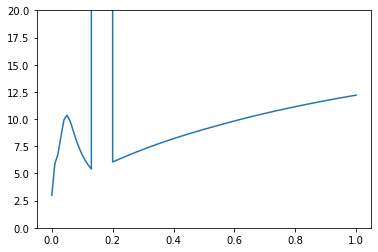

In [83]:
fees=np.linspace(0,1,101)
xvals=np.zeros(101)
for i in range(0,101):
    xvals[i]=X(fees[i])
plt.plot(fees,xvals)
plt.ylim(0,20)

How does the price of X vary with the transaction fees
A. Always increasing
B. Always decreasing
C. Does not change
D. None of the Above